In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinic = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(mouse, clinic, on='Mouse ID', how="outer")

# Display the data table for preview
merged.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
dr_time_tum = merged[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
drug_group = dr_time_tum.groupby(['Drug','Timepoint'])
# Convert to DataFrame
drug_mean_tum = pd.DataFrame(drug_group['Tumor Volume (mm3)'].mean())
# Preview DataFrame
drug_mean_tum.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drugnames = merged['Drug'].unique()
timepoints = [0,5,10,15,20,25,30,35,40,45]
sem_df = pd.DataFrame()
mean_df = pd.DataFrame()
for n in drugnames:
    drug = pd.DataFrame(merged.loc[merged['Drug'] == n, :])
    semlist = []
    meanlist = []
    for i in timepoints:
        t = drug.loc[drug['Timepoint'] == i, 'Tumor Volume (mm3)']
        sems = sem(t)
        mean = t.mean()
        semlist.append(sems)
        meanlist.append(mean)
       # print(semlist)
        
    sem_df[n] = semlist
    mean_df[n] = meanlist
    
sem_df.index= timepoints
mean_df.index= timepoints
# Convert to DataFrame
sem_df.head()
# Preview DataFrame


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.239862,0.231708,0.202385,0.264819,0.448593,0.235102,0.164505,0.188950,0.482955,0.218091
10,0.433678,0.376195,0.319415,0.357421,0.702684,0.282346,0.236144,0.263949,0.720225,0.402064
15,0.493261,0.466109,0.444378,0.580268,0.838617,0.357705,0.332053,0.370544,0.770432,0.614461
20,0.621889,0.555181,0.595260,0.726484,0.909731,0.476210,0.359482,0.533182,0.786199,0.839609


In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_df.head()

,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,47.527452,47.248967,46.796098,47.389175,44.266086,47.062001,46.503051,46.851818,43.944859,47.125589
10,49.463844,49.101541,48.694210,49.582269,43.084291,49.403909,48.285125,48.689881,42.531957,49.423329
15,51.529409,51.067318,50.933018,52.399974,42.064317,51.296397,50.094055,50.779059,41.495061,51.359742
20,54.067395,53.346737,53.644087,54.920935,40.716325,53.197691,52.157049,53.170334,40.238325,54.364417


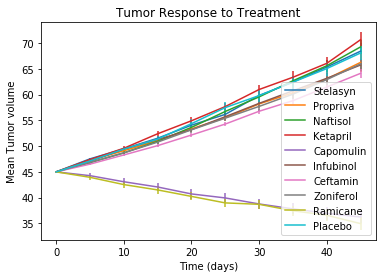

In [7]:
# Generate the Plot (with Error Bars)
mean_df.plot(yerr=sem_df, title='Tumor Response to Treatment')
plt.ylabel('Mean Tumor volume')
plt.xlabel('Time (days)')

# Save the Figure
plt.savefig('Tumorresponse.png')
plt.show()


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
dr_time_met = merged[['Drug', 'Timepoint', 'Metastatic Sites']]
# Convert to DataFrame
met_group = dr_time_met.groupby(['Drug', 'Timepoint'])
# Preview DataFrame
met_mean = pd.DataFrame(met_group['Metastatic Sites'].mean())
met_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_df = pd.DataFrame()
mean_met_df = pd.DataFrame()
for n in drugnames:
    drug = pd.DataFrame(merged.loc[merged['Drug'] == n, :])
    semlist = []
    meanlist = []
    for i in timepoints:
        t = drug.loc[drug['Timepoint'] == i, 'Metastatic Sites']
        sems = sem(t)
        mean = t.mean()
        semlist.append(sems)
        meanlist.append(mean)
       # print(semlist)
        
    sem_met_df[n] = semlist
    mean_met_df[n] = meanlist
# Convert to DataFrame

# Preview DataFrame
sem_met_df.head()

,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.087178,0.095219,0.093618,0.098100,0.074833,0.091652,0.108588,0.077709,0.066332,0.100947
2,0.123672,0.105690,0.163577,0.142018,0.125433,0.159364,0.152177,0.109109,0.090289,0.115261
3,0.153439,0.136377,0.158651,0.191381,0.132048,0.194015,0.180625,0.111677,0.115261,0.190221
4,0.200905,0.171499,0.181731,0.236680,0.161621,0.234801,0.241034,0.166378,0.119430,0.234064


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_met_df.head()

,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.240000,0.320000,0.260870,0.304348,0.160000,0.280000,0.380952,0.166667,0.120000,0.375000
2,0.478261,0.565217,0.523810,0.590909,0.320000,0.666667,0.600000,0.500000,0.250000,0.833333
3,0.782609,0.764706,0.857143,0.842105,0.375000,0.904762,0.789474,0.809524,0.333333,1.250000
4,0.952381,1.000000,1.150000,1.210526,0.652174,1.050000,1.111111,1.294118,0.347826,1.526316


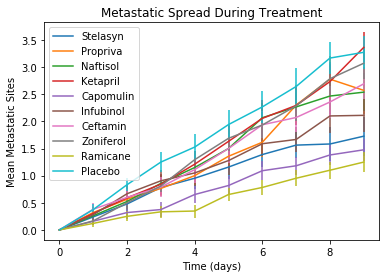

In [11]:
# Generate the Plot (with Error Bars)
mean_met_df.plot(yerr=sem_met_df, title='Metastatic Spread During Treatment')
# Save the Figure
plt.ylabel('Mean Metastatic Sites')
plt.xlabel('Time (days)')
plt.savefig('Metastatics.png')
plt.show()
# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_df = pd.DataFrame()

for n in drugnames:
    drug = pd.DataFrame(merged.loc[merged['Drug'] == n, :])
    mouselist=[]
    for i in timepoints:
        t = drug.loc[drug['Timepoint'] == i, :]
        count = len(t)
        mouselist.append(count)
       # print(semlist)
        
    mouse_df[n] = mouselist
# Convert to DataFrame
mouse_df.index = timepoints
mouse_df.head()
# Preview DataFrame


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
0,26,26,25,25,25,25,25,25,25,25
5,25,25,23,23,25,25,21,24,25,24
10,23,23,21,22,25,21,20,22,24,24
15,23,17,21,19,24,21,19,21,24,20
20,21,17,20,19,23,20,18,17,23,19


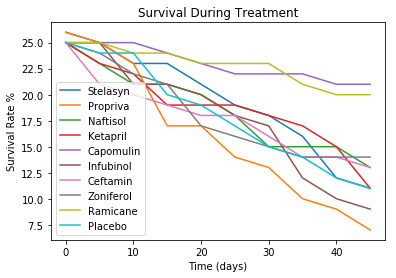

In [13]:
# Generate the Plot (Accounting for percentages)
mouse_df.plot(title='Survival During Treatment')
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate %')
# Save the Figure
plt.savefig('Survival.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
per_change_df = mean_df.loc[[0,45], :]
# Display the data to confirm
per_change = pd.DataFrame((per_change_df.loc[45,:] - per_change_df.loc[0,:])/per_change_df.loc[0,:] * 100)
per_change

,0
Stelasyn,52.085134
Propriva,47.241175
Naftisol,53.923347
Ketapril,57.028795
Capomulin,-19.475303
Infubinol,46.123472
Ceftamin,42.516492
Zoniferol,46.579751
Ramicane,-22.320900
Placebo,51.297960


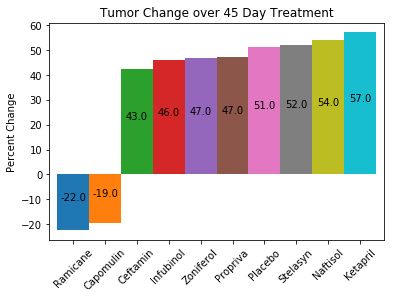

In [152]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
per_change_sort = per_change[0].sort_values(ascending=True)

# Orient widths. Add labels, tick marks, etc. 
ax = per_change_sort.plot(kind='bar', width = 1, title='Tumor Change over 45 Day Treatment')

rect = ax.patches

# Use functions to label the percentages of changes
for rect, label in zip(rect, round(per_change_sort,0)):
    height = rect.get_height()/2
    plt.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.ylabel('Percent Change')

plt.savefig('TumorChange.png')

plt.show()


